In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K

/home/dzmitry/miniconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
img_width, img_height = 150, 150

train_data_dir = '/mnt/Evidence/cats-vs-dogs/train'
validation_data_dir = '/mnt/Evidence/cats-vs-dogs/validate'
epochs = 200
batch_size = 16
nb_train_samples = 2208
nb_validation_samples = 2208

if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

In [4]:
def get_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), input_shape=input_shape))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(32, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(64, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())
    model.add(Dense(64))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1))
    model.add(Activation('sigmoid'))

    model.compile(loss='binary_crossentropy',
                  optimizer='rmsprop',
                  metrics=['accuracy'])

    return model

In [5]:
# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.0,
    zoom_range=0.0,
    horizontal_flip=False)

# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1. / 255)

In [6]:
import itertools
import random

train_generator_random_batches_random_order = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

train_generator_snapshot = list(itertools.islice(train_generator_random_batches_random_order, 138))
train_generator_constant_batches_constant_order = itertools.cycle(train_generator_snapshot)

def random_order_iterable(lst):
    while True: yield random.choice(lst)
train_generator_constant_batches_random_order = iter(random_order_iterable(train_generator_snapshot))

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 2208 images belonging to 2 classes.
Found 2208 images belonging to 2 classes.


In [7]:
def plot_batch(batch):
    fig=plt.figure(figsize=(8, 8))
    columns = 4
    rows = 4
    for i in range(1, columns*rows +1):
        img = batch[i-1]
        fig.add_subplot(rows, columns, i)
        plt.imshow(img)
    plt.show()

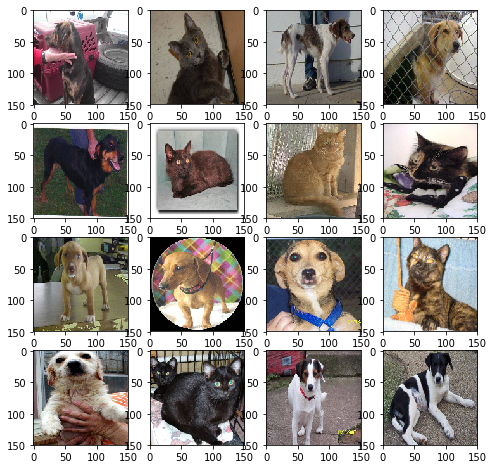

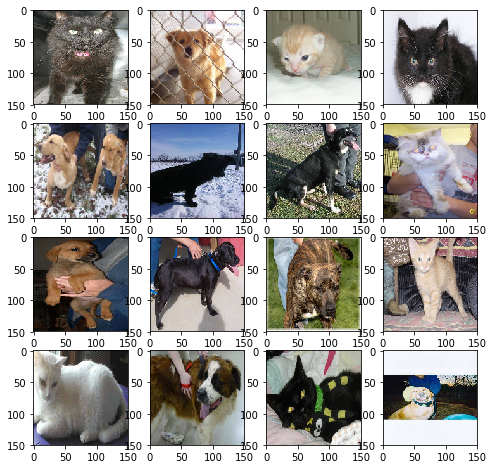

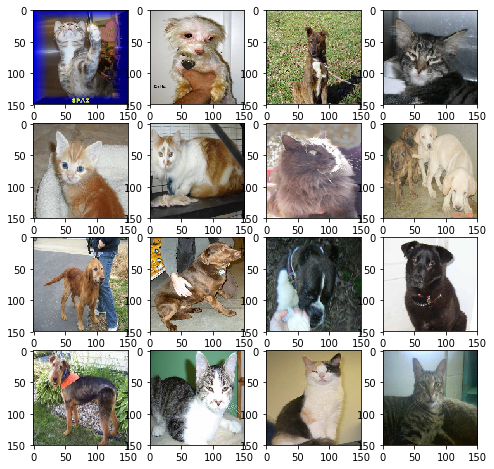

In [8]:
plot_batch(next(train_generator_random_batches_random_order)[0])
plot_batch(next(train_generator_constant_batches_constant_order)[0])
plot_batch(next(train_generator_constant_batches_random_order)[0])

In [9]:
# skip all remaining batches
for i in range(0,nb_train_samples//batch_size -1):
    next(train_generator_random_batches_random_order)
    next(train_generator_constant_batches_constant_order)
    next(train_generator_constant_batches_random_order)

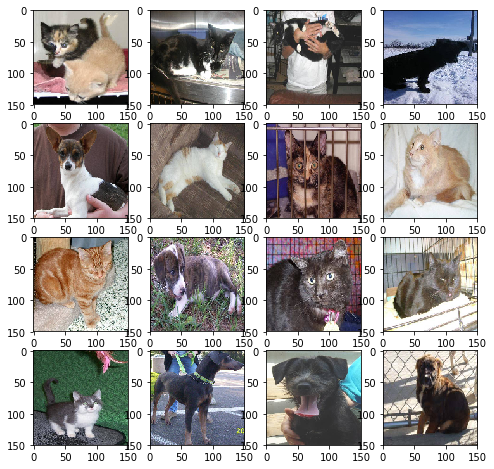

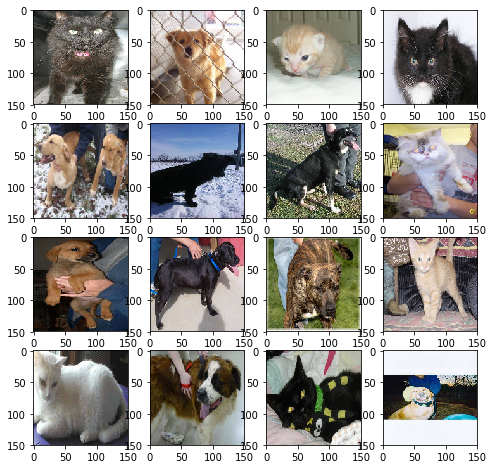

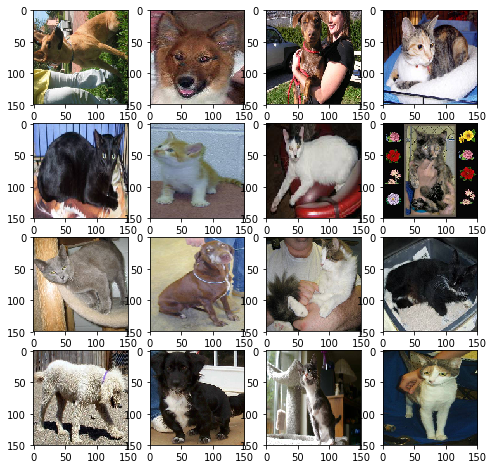

In [10]:
plot_batch(next(train_generator_random_batches_random_order)[0])
plot_batch(next(train_generator_constant_batches_constant_order)[0])
plot_batch(next(train_generator_constant_batches_random_order)[0])

In [11]:
import keras
class PlotLearning(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.i = 0
        self.x = []
        self.losses = []
        self.val_losses = []
        self.acc = []
        self.val_acc = []
        self.fig = plt.figure()
        
        self.logs = []

    def on_epoch_end(self, epoch, logs={}):
        
        self.logs.append(logs)
        self.x.append(self.i)
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))
        self.acc.append(logs.get('acc'))
        self.val_acc.append(logs.get('val_acc'))

In [12]:
history_random_batches_random_order = get_model().fit_generator(
    train_generator_random_batches_random_order,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size)

Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead
Epoch 1/200
138/138 [==============================] - 10s 72ms/step - loss: 0.6922 - acc: 0.5340 - val_loss: 0.6757 - val_acc: 0.5824
Epoch 2/200
138/138 [==============================] - 8s 60ms/step - loss: 0.6555 - acc: 0.6350 - val_loss: 0.6131 - val_acc: 0.6630
Epoch 3/200
138/138 [==============================] - 8s 59ms/step - loss: 0.6060 - acc: 0.6748 - val_loss: 0.6408 - val_acc: 0.6001
Epoch 4/200
138/138 [==============================] - 8s 60ms/step - loss: 0.5669 - acc: 0.7133 - val_loss: 0.5501 - val_acc: 0.7292
Epoch 5/200
138/138 [==============================] - 8s 58ms/step - loss: 0.5271 - acc: 0.7423 - val_loss: 0.5475 - val_acc: 0.7255
Epoch 6/200
138/138 [==============================] - 8s 59ms/step - loss: 0.4844 - acc: 0.7708 - val_loss: 0.5317 - val_acc: 0.7360
Epoch 7/200
138/138 [============================

138/138 [==============================] - 8s 59ms/step - loss: 0.3000 - acc: 0.9103 - val_loss: 1.4354 - val_acc: 0.7450
Epoch 58/200
138/138 [==============================] - 8s 59ms/step - loss: 0.3483 - acc: 0.9099 - val_loss: 1.4447 - val_acc: 0.7486
Epoch 59/200
138/138 [==============================] - 8s 59ms/step - loss: 0.2829 - acc: 0.9121 - val_loss: 2.6811 - val_acc: 0.7450
Epoch 60/200
138/138 [==============================] - 8s 60ms/step - loss: 0.4071 - acc: 0.8881 - val_loss: 2.2144 - val_acc: 0.7382
Epoch 61/200
138/138 [==============================] - 8s 59ms/step - loss: 0.3529 - acc: 0.9053 - val_loss: 1.2069 - val_acc: 0.7554
Epoch 62/200
138/138 [==============================] - 8s 58ms/step - loss: 0.3326 - acc: 0.8890 - val_loss: 1.3520 - val_acc: 0.7455
Epoch 63/200
138/138 [==============================] - 8s 59ms/step - loss: 0.3653 - acc: 0.9004 - val_loss: 1.5527 - val_acc: 0.7387
Epoch 64/200
138/138 [==============================] - 8s 58ms/step

138/138 [==============================] - 8s 59ms/step - loss: 0.3674 - acc: 0.8777 - val_loss: 1.1314 - val_acc: 0.7446
Epoch 118/200
138/138 [==============================] - 8s 59ms/step - loss: 0.2895 - acc: 0.8986 - val_loss: 1.4008 - val_acc: 0.7464
Epoch 119/200
138/138 [==============================] - 8s 59ms/step - loss: 0.3754 - acc: 0.8854 - val_loss: 1.2448 - val_acc: 0.7572
Epoch 120/200
138/138 [==============================] - 8s 59ms/step - loss: 0.3669 - acc: 0.8845 - val_loss: 1.0961 - val_acc: 0.7418
Epoch 121/200
138/138 [==============================] - 8s 59ms/step - loss: 0.3780 - acc: 0.8995 - val_loss: 1.2854 - val_acc: 0.7554
Epoch 122/200
138/138 [==============================] - 8s 60ms/step - loss: 0.3259 - acc: 0.8990 - val_loss: 1.7081 - val_acc: 0.7622
Epoch 123/200
138/138 [==============================] - 8s 59ms/step - loss: 0.2887 - acc: 0.8954 - val_loss: 1.6274 - val_acc: 0.7491
Epoch 124/200
138/138 [==============================] - 8s 59

138/138 [==============================] - 8s 59ms/step - loss: 0.2192 - acc: 0.9321 - val_loss: 1.1692 - val_acc: 0.7736
Epoch 178/200
138/138 [==============================] - 8s 59ms/step - loss: 0.2897 - acc: 0.9189 - val_loss: 1.1004 - val_acc: 0.7351
Epoch 179/200
138/138 [==============================] - 8s 59ms/step - loss: 0.3795 - acc: 0.8741 - val_loss: 1.2965 - val_acc: 0.7210
Epoch 180/200
138/138 [==============================] - 8s 59ms/step - loss: 0.3060 - acc: 0.9144 - val_loss: 1.4095 - val_acc: 0.7672
Epoch 181/200
138/138 [==============================] - 8s 59ms/step - loss: 0.2786 - acc: 0.9262 - val_loss: 1.2108 - val_acc: 0.7613
Epoch 182/200
138/138 [==============================] - 8s 60ms/step - loss: 0.2873 - acc: 0.9275 - val_loss: 1.2498 - val_acc: 0.7604
Epoch 183/200
138/138 [==============================] - 8s 59ms/step - loss: 0.3501 - acc: 0.9108 - val_loss: 1.6699 - val_acc: 0.7360
Epoch 184/200
138/138 [==============================] - 8s 59

In [13]:
history_constant_batches_constant_order = get_model().fit_generator(
    train_generator_constant_batches_constant_order,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size)

Epoch 1/200
138/138 [==============================] - 6s 45ms/step - loss: 0.7044 - acc: 0.5448 - val_loss: 0.6776 - val_acc: 0.5240
Epoch 2/200
138/138 [==============================] - 6s 43ms/step - loss: 0.6638 - acc: 0.6033 - val_loss: 0.6366 - val_acc: 0.5956
Epoch 3/200
138/138 [==============================] - 6s 43ms/step - loss: 0.6156 - acc: 0.6667 - val_loss: 0.6188 - val_acc: 0.6449
Epoch 4/200
138/138 [==============================] - 6s 43ms/step - loss: 0.5654 - acc: 0.7192 - val_loss: 0.6086 - val_acc: 0.6440
Epoch 5/200
138/138 [==============================] - 6s 43ms/step - loss: 0.5304 - acc: 0.7500 - val_loss: 0.6256 - val_acc: 0.6630
Epoch 6/200
138/138 [==============================] - 6s 43ms/step - loss: 0.4859 - acc: 0.7812 - val_loss: 0.5795 - val_acc: 0.7165
Epoch 7/200
138/138 [==============================] - 6s 43ms/step - loss: 0.4312 - acc: 0.8048 - val_loss: 0.6408 - val_acc: 0.6902
Epoch 8/200
138/138 [==============================] - 6s 43ms

Epoch 62/200
138/138 [==============================] - 6s 43ms/step - loss: 0.2283 - acc: 0.9198 - val_loss: 1.6470 - val_acc: 0.7260
Epoch 63/200
138/138 [==============================] - 6s 42ms/step - loss: 0.3270 - acc: 0.9094 - val_loss: 2.0550 - val_acc: 0.7206
Epoch 64/200
138/138 [==============================] - 6s 43ms/step - loss: 0.2759 - acc: 0.9262 - val_loss: 2.1405 - val_acc: 0.7138
Epoch 65/200
138/138 [==============================] - 6s 42ms/step - loss: 0.2675 - acc: 0.9253 - val_loss: 1.1990 - val_acc: 0.6834
Epoch 66/200
138/138 [==============================] - 6s 42ms/step - loss: 0.3076 - acc: 0.9185 - val_loss: 2.0775 - val_acc: 0.7065
Epoch 67/200
138/138 [==============================] - 6s 43ms/step - loss: 0.3230 - acc: 0.8940 - val_loss: 1.7073 - val_acc: 0.7437
Epoch 68/200
138/138 [==============================] - 6s 43ms/step - loss: 0.3294 - acc: 0.8895 - val_loss: 1.2274 - val_acc: 0.7323
Epoch 69/200
138/138 [==============================] -

138/138 [==============================] - 6s 43ms/step - loss: 0.4224 - acc: 0.8555 - val_loss: 0.8206 - val_acc: 0.6979
Epoch 123/200
138/138 [==============================] - 6s 43ms/step - loss: 0.3805 - acc: 0.8818 - val_loss: 3.5319 - val_acc: 0.7215
Epoch 124/200
138/138 [==============================] - 6s 43ms/step - loss: 0.4403 - acc: 0.8628 - val_loss: 2.0616 - val_acc: 0.6884
Epoch 125/200
138/138 [==============================] - 6s 43ms/step - loss: 0.4028 - acc: 0.8655 - val_loss: 0.8987 - val_acc: 0.6834
Epoch 126/200
138/138 [==============================] - 6s 42ms/step - loss: 0.3728 - acc: 0.8646 - val_loss: 1.6084 - val_acc: 0.7332
Epoch 127/200
138/138 [==============================] - 6s 43ms/step - loss: 0.3972 - acc: 0.8664 - val_loss: 2.4327 - val_acc: 0.6898
Epoch 128/200
138/138 [==============================] - 6s 43ms/step - loss: 0.3680 - acc: 0.8696 - val_loss: 1.2801 - val_acc: 0.7219
Epoch 129/200
138/138 [==============================] - 6s 42

138/138 [==============================] - 6s 43ms/step - loss: 0.4599 - acc: 0.8415 - val_loss: 0.9194 - val_acc: 0.7192
Epoch 183/200
138/138 [==============================] - 6s 42ms/step - loss: 0.5102 - acc: 0.8591 - val_loss: 1.1862 - val_acc: 0.7165
Epoch 184/200
138/138 [==============================] - 6s 42ms/step - loss: 0.4123 - acc: 0.8768 - val_loss: 1.6046 - val_acc: 0.7147
Epoch 185/200
138/138 [==============================] - 6s 43ms/step - loss: 0.3450 - acc: 0.8868 - val_loss: 1.6100 - val_acc: 0.7355
Epoch 186/200
138/138 [==============================] - 6s 42ms/step - loss: 0.4898 - acc: 0.8827 - val_loss: 0.8864 - val_acc: 0.7183
Epoch 187/200
138/138 [==============================] - 6s 43ms/step - loss: 0.4169 - acc: 0.8895 - val_loss: 1.4780 - val_acc: 0.7296
Epoch 188/200
138/138 [==============================] - 6s 43ms/step - loss: 0.4801 - acc: 0.8886 - val_loss: 1.5818 - val_acc: 0.7283
Epoch 189/200
138/138 [==============================] - 6s 43

In [14]:
history_constant_batches_random_order = get_model().fit_generator(
    train_generator_constant_batches_random_order,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size)

Epoch 1/200
138/138 [==============================] - 6s 45ms/step - loss: 0.7319 - acc: 0.5444 - val_loss: 0.6784 - val_acc: 0.6101
Epoch 2/200
138/138 [==============================] - 6s 44ms/step - loss: 0.6529 - acc: 0.6146 - val_loss: 0.6125 - val_acc: 0.6422
Epoch 3/200
138/138 [==============================] - 6s 44ms/step - loss: 0.5860 - acc: 0.6961 - val_loss: 0.5826 - val_acc: 0.7034
Epoch 4/200
138/138 [==============================] - 6s 42ms/step - loss: 0.5716 - acc: 0.6997 - val_loss: 0.5933 - val_acc: 0.6997
Epoch 5/200
138/138 [==============================] - 6s 43ms/step - loss: 0.5103 - acc: 0.7532 - val_loss: 0.5767 - val_acc: 0.7160
Epoch 6/200
138/138 [==============================] - 6s 43ms/step - loss: 0.4522 - acc: 0.7867 - val_loss: 0.6905 - val_acc: 0.6970
Epoch 7/200
138/138 [==============================] - 6s 43ms/step - loss: 0.4362 - acc: 0.8152 - val_loss: 0.5681 - val_acc: 0.7369
Epoch 8/200
138/138 [==============================] - 6s 43ms

Epoch 62/200
138/138 [==============================] - 6s 43ms/step - loss: 0.3159 - acc: 0.8936 - val_loss: 1.3917 - val_acc: 0.6812
Epoch 63/200
138/138 [==============================] - 6s 43ms/step - loss: 0.3061 - acc: 0.8854 - val_loss: 1.3190 - val_acc: 0.6812
Epoch 64/200
138/138 [==============================] - 6s 43ms/step - loss: 0.3436 - acc: 0.8791 - val_loss: 0.9932 - val_acc: 0.6716
Epoch 65/200
138/138 [==============================] - 6s 43ms/step - loss: 0.2765 - acc: 0.9044 - val_loss: 1.5562 - val_acc: 0.7305
Epoch 66/200
138/138 [==============================] - 6s 42ms/step - loss: 0.4143 - acc: 0.8936 - val_loss: 1.2369 - val_acc: 0.6771
Epoch 67/200
138/138 [==============================] - 6s 42ms/step - loss: 0.3831 - acc: 0.8791 - val_loss: 1.3295 - val_acc: 0.7373
Epoch 68/200
138/138 [==============================] - 6s 43ms/step - loss: 0.3807 - acc: 0.8850 - val_loss: 1.5250 - val_acc: 0.7020
Epoch 69/200
138/138 [==============================] -

138/138 [==============================] - 6s 43ms/step - loss: 0.4674 - acc: 0.8478 - val_loss: 1.2111 - val_acc: 0.7111
Epoch 123/200
138/138 [==============================] - 6s 42ms/step - loss: 0.3209 - acc: 0.8927 - val_loss: 0.8108 - val_acc: 0.6771
Epoch 124/200
138/138 [==============================] - 6s 43ms/step - loss: 0.4305 - acc: 0.8383 - val_loss: 2.6625 - val_acc: 0.7351
Epoch 125/200
138/138 [==============================] - 6s 43ms/step - loss: 0.3844 - acc: 0.8601 - val_loss: 1.0638 - val_acc: 0.7459
Epoch 126/200
138/138 [==============================] - 6s 42ms/step - loss: 0.4394 - acc: 0.8361 - val_loss: 1.0770 - val_acc: 0.6517
Epoch 127/200
138/138 [==============================] - 6s 42ms/step - loss: 0.4924 - acc: 0.8528 - val_loss: 2.0585 - val_acc: 0.7120
Epoch 128/200
138/138 [==============================] - 6s 43ms/step - loss: 0.4167 - acc: 0.8587 - val_loss: 0.9412 - val_acc: 0.7015
Epoch 129/200
138/138 [==============================] - 6s 42

138/138 [==============================] - 6s 43ms/step - loss: 0.8039 - acc: 0.8442 - val_loss: 0.9923 - val_acc: 0.7396
Epoch 183/200
138/138 [==============================] - 6s 43ms/step - loss: 0.8698 - acc: 0.8542 - val_loss: 1.1664 - val_acc: 0.7613
Epoch 184/200
138/138 [==============================] - 6s 42ms/step - loss: 0.4485 - acc: 0.8483 - val_loss: 1.2720 - val_acc: 0.7210
Epoch 185/200
138/138 [==============================] - 6s 42ms/step - loss: 0.4419 - acc: 0.8786 - val_loss: 1.1709 - val_acc: 0.7532
Epoch 186/200
138/138 [==============================] - 6s 44ms/step - loss: 0.3892 - acc: 0.8696 - val_loss: 2.3108 - val_acc: 0.6685
Epoch 187/200
138/138 [==============================] - 6s 42ms/step - loss: 0.4426 - acc: 0.8782 - val_loss: 1.0372 - val_acc: 0.6884
Epoch 188/200
138/138 [==============================] - 6s 43ms/step - loss: 0.3980 - acc: 0.8764 - val_loss: 0.8518 - val_acc: 0.7079
Epoch 189/200
138/138 [==============================] - 6s 42

In [15]:
import seaborn as sns
import pandas as pd

In [16]:
train_datagen_w_augmentation = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=False)

In [17]:
train_generator_random_batches_random_order_w_augmentation = train_datagen_w_augmentation.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 2208 images belonging to 2 classes.


In [18]:
history_random_batches_random_order_w_augmentation = get_model().fit_generator(
    train_generator_random_batches_random_order_w_augmentation,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size)

Epoch 1/200
138/138 [==============================] - 14s 100ms/step - loss: 0.7442 - acc: 0.5181 - val_loss: 0.6843 - val_acc: 0.5435
Epoch 2/200
138/138 [==============================] - 13s 94ms/step - loss: 0.6867 - acc: 0.5716 - val_loss: 0.6494 - val_acc: 0.6449
Epoch 3/200
138/138 [==============================] - 13s 94ms/step - loss: 0.6481 - acc: 0.6436 - val_loss: 0.6027 - val_acc: 0.6775
Epoch 4/200
138/138 [==============================] - 13s 94ms/step - loss: 0.6073 - acc: 0.6680 - val_loss: 0.5735 - val_acc: 0.7052
Epoch 5/200
138/138 [==============================] - 13s 93ms/step - loss: 0.5770 - acc: 0.7024 - val_loss: 0.5456 - val_acc: 0.7192
Epoch 6/200
138/138 [==============================] - 13s 92ms/step - loss: 0.5710 - acc: 0.7120 - val_loss: 0.5477 - val_acc: 0.7255
Epoch 7/200
138/138 [==============================] - 13s 94ms/step - loss: 0.5479 - acc: 0.7274 - val_loss: 0.5675 - val_acc: 0.6957
Epoch 8/200
138/138 [==============================] -

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Epoch 127/200
138/138 [==============================] - 13s 94ms/step - loss: 0.4025 - acc: 0.8379 - val_loss: 0.5705 - val_acc: 0.7853
Epoch 128/200
138/138 [==============================] - 13s 93ms/step - loss: 0.3783 - acc: 0.8569 - val_loss: 0.8092 - val_acc: 0.7899
Epoch 129/200
138/138 [==============================] - 13s 94ms/step - loss: 0.3910 - acc: 0.8582 - val_loss: 0.4981 - val_acc: 0.7962
Epoch 130/200
138/138 [==============================] - 13s 94ms/step - loss: 0.4112 - acc: 0.8514 - val_loss: 0.5392 - val_acc: 0.8021
Epoch 131/200
138/138 [==============================] - 13s 93ms/step - loss: 0.3819 - acc: 0.8474 - val_loss: 0.6649 - val_acc: 0.7803
Epoch 132/200
138/138 [==============================] - 13s 93ms/step - loss: 0.3799 - acc: 0.8578 - val_loss: 0.6613 - val_acc: 0.7758
Epoch 133/200
138/138 [==============================] - 13s 93ms/step - loss: 0.3948 - acc: 0.8356 - val_loss: 0.5450 - val_acc: 0.8120
Epoch 134/200
138/138 [==================

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



138/138 [==============================] - 13s 96ms/step - loss: 0.3865 - acc: 0.8551 - val_loss: 1.0799 - val_acc: 0.7803
Epoch 176/200
138/138 [==============================] - 13s 93ms/step - loss: 0.4136 - acc: 0.8451 - val_loss: 0.5498 - val_acc: 0.8197: 2s - los - ETA: 1s - loss:
Epoch 177/200
138/138 [==============================] - 13s 94ms/step - loss: 0.3685 - acc: 0.8456 - val_loss: 0.6109 - val_acc: 0.7799
Epoch 178/200
138/138 [==============================] - 13s 95ms/step - loss: 0.4184 - acc: 0.8279 - val_loss: 0.6161 - val_acc: 0.7862
Epoch 188/200
138/138 [==============================] - 13s 93ms/step - loss: 0.4006 - acc: 0.8370 - val_loss: 0.9376 - val_acc: 0.7147: 0.3982 - ac
Epoch 189/200
138/138 [==============================] - 13s 94ms/step - loss: 0.4772 - acc: 0.8261 - val_loss: 0.5465 - val_acc: 0.8084
Epoch 190/200
138/138 [==============================] - 13s 93ms/step - loss: 0.4135 - acc: 0.8415 - val_loss: 0.7453 - val_acc: 0.8066
Epoch 191/200


In [19]:
train_generator_fixed_batches_fixed_order_w_augmentation = train_datagen_w_augmentation.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False)

Found 2208 images belonging to 2 classes.


In [20]:
history_fixed_batches_fixed_order_w_augmentation = get_model().fit_generator(
    train_generator_fixed_batches_fixed_order_w_augmentation,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size)

Epoch 1/200
138/138 [==============================] - 14s 102ms/step - loss: 0.8586 - acc: 0.4950 - val_loss: 0.7535 - val_acc: 0.5000
Epoch 2/200
138/138 [==============================] - 13s 94ms/step - loss: 0.7022 - acc: 0.5072 - val_loss: 0.6931 - val_acc: 0.5009
Epoch 3/200
138/138 [==============================] - 13s 94ms/step - loss: 0.7241 - acc: 0.4986 - val_loss: 0.6941 - val_acc: 0.5000
Epoch 4/200
138/138 [==============================] - 13s 94ms/step - loss: 0.7189 - acc: 0.5140 - val_loss: 0.6912 - val_acc: 0.5199
Epoch 5/200
138/138 [==============================] - 13s 94ms/step - loss: 0.7453 - acc: 0.5168 - val_loss: 0.6883 - val_acc: 0.5213
Epoch 6/200
138/138 [==============================] - 13s 94ms/step - loss: 0.7611 - acc: 0.5276 - val_loss: 0.6760 - val_acc: 0.5865
Epoch 7/200
138/138 [==============================] - 13s 94ms/step - loss: 0.7123 - acc: 0.5553 - val_loss: 0.6624 - val_acc: 0.5779
Epoch 8/200
138/138 [==============================] -

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



138/138 [==============================] - 13s 94ms/step - loss: 0.4554 - acc: 0.8234 - val_loss: 0.5612 - val_acc: 0.7668
Epoch 70/200
138/138 [==============================] - 13s 93ms/step - loss: 0.4298 - acc: 0.8419 - val_loss: 0.9041 - val_acc: 0.6594
Epoch 71/200
138/138 [==============================] - 13s 94ms/step - loss: 0.4407 - acc: 0.8256 - val_loss: 0.5563 - val_acc: 0.7351
Epoch 72/200
138/138 [==============================] - 13s 95ms/step - loss: 0.4460 - acc: 0.8148 - val_loss: 0.5514 - val_acc: 0.7423
Epoch 73/200
138/138 [==============================] - 13s 94ms/step - loss: 0.4259 - acc: 0.8225 - val_loss: 1.0768 - val_acc: 0.7178
Epoch 74/200
138/138 [==============================] - 13s 93ms/step - loss: 0.4735 - acc: 0.8080 - val_loss: 0.5795 - val_acc: 0.7550
Epoch 75/200
138/138 [==============================] - 13s 93ms/step - loss: 0.4387 - acc: 0.8311 - val_loss: 0.5303 - val_acc: 0.7260
Epoch 76/200
138/138 [==============================] - 13s 9

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



138/138 [==============================] - 13s 94ms/step - loss: 0.5123 - acc: 0.8329 - val_loss: 0.6593 - val_acc: 0.7627
Epoch 124/200
138/138 [==============================] - 13s 94ms/step - loss: 0.4766 - acc: 0.8211 - val_loss: 0.6232 - val_acc: 0.7414
Epoch 125/200
138/138 [==============================] - 13s 93ms/step - loss: 0.4421 - acc: 0.8130 - val_loss: 0.7953 - val_acc: 0.7663
Epoch 126/200
138/138 [==============================] - 13s 94ms/step - loss: 0.4998 - acc: 0.8311 - val_loss: 0.8280 - val_acc: 0.7409
Epoch 127/200
138/138 [==============================] - 13s 94ms/step - loss: 0.4525 - acc: 0.8279 - val_loss: 0.6039 - val_acc: 0.7591
Epoch 128/200
138/138 [==============================] - 13s 94ms/step - loss: 0.4901 - acc: 0.8234 - val_loss: 0.6100 - val_acc: 0.7491
Epoch 129/200
138/138 [==============================] - 13s 93ms/step - loss: 0.4548 - acc: 0.8220 - val_loss: 0.5746 - val_acc: 0.7360
Epoch 130/200
138/138 [==============================] 

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



138/138 [==============================] - 13s 94ms/step - loss: 0.5544 - acc: 0.8075 - val_loss: 0.5890 - val_acc: 0.7292
Epoch 196/200
138/138 [==============================] - 13s 94ms/step - loss: 0.4765 - acc: 0.8197 - val_loss: 0.6595 - val_acc: 0.7405
Epoch 197/200
138/138 [==============================] - 13s 95ms/step - loss: 0.5267 - acc: 0.8130 - val_loss: 0.8126 - val_acc: 0.7341
Epoch 198/200
138/138 [==============================] - 13s 94ms/step - loss: 0.5873 - acc: 0.8084 - val_loss: 0.5809 - val_acc: 0.7672
Epoch 199/200
138/138 [==============================] - 13s 94ms/step - loss: 0.5867 - acc: 0.8329 - val_loss: 0.8157 - val_acc: 0.7287
Epoch 200/200
138/138 [==============================] - 13s 94ms/step - loss: 0.5110 - acc: 0.8098 - val_loss: 0.7497 - val_acc: 0.7391


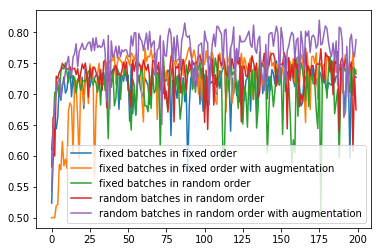

In [21]:
pd.DataFrame({'random batches in random order': history_random_batches_random_order.history['val_acc'],
              'fixed batches in fixed order': history_constant_batches_constant_order.history['val_acc'],
              'fixed batches in random order': history_constant_batches_random_order.history['val_acc'],
              'random batches in random order with augmentation': history_random_batches_random_order_w_augmentation.history['val_acc'],
              'fixed batches in fixed order with augmentation': history_fixed_batches_fixed_order_w_augmentation.history['val_acc']
                  }).plot()